# Lecture : Recommendation on Graphs

## Lab 01 : PageRank -- Exercise

### Xavier Bresson, Nian Liu    


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5284_2024_codes/codes/05_Recommendation'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    

In [2]:
# Load libraries
import numpy as np
import scipy.io
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time
import sys; sys.path.insert(0, 'lib/')
import scipy.sparse.linalg
import warnings; warnings.filterwarnings("ignore")


# Synthetic small graph

In [3]:
# Data matrix 
mat = scipy.io.loadmat('datasets/pagerank_synthetic.mat')
W = mat['W']
W = scipy.sparse.csr_matrix(W)
Wref = W
X = mat['X']
n = X.shape[0]
d = X.shape[1]
E = mat['E']
XE = mat['X2']
print('num_nodes:',n)


num_nodes: 11


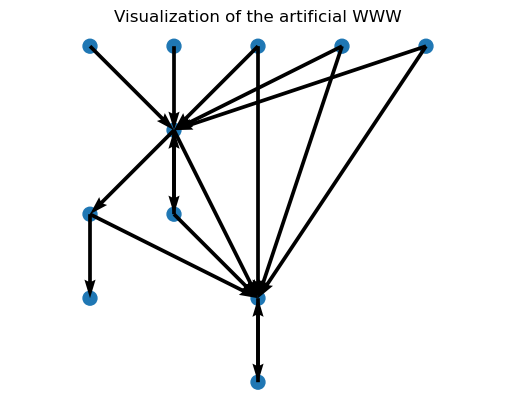

In [4]:
plt.figure(1)
size_vertex_plot = 100
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n))
plt.quiver(XE[:,0], XE[:,1], E[:,0], E[:,1], scale=1., units='xy') 
plt.title('Visualization of the artificial WWW')
plt.axis('equal')
plt.axis('off') 
plt.show()

### Question 1: Implementing PageRank using the Spectral Approach

Refer to Slide 17 from Lecture 5.

### Step 1: Construct the Degree Matrix D and its Inverse D$^{-1}$ from the Adjacency Matrix W

Account for cases where a node has zero degree.

Hint: You may find the following functions helpful: `numpy.sum()`, `numpy.where()`, and `numpy.diag()`.


In [5]:
# Solve eigenproblem

# vectors of 1's
e = np.ones([n,1])/n  # 11, 1
one = np.ones([n,1]) # 11, 1
############################################################################
# Your code starts
# Construct degree matrix D and its inverse invD with W
############################################################################
# W Shape = 11, 11
D = np.array(W.sum(axis=1),dtype='float32').squeeze()
w_idx = np.zeros(n) # Create a zero vector to track for node with zero degrees
w_idx[np.where(D < 0.5)] = 1 # Mark on row i if summation of row i is 0
w = 1 * w_idx # Revert back to float
w = w[:, None] # Unsqueeze w to 2d
invD = 1 / D # Inverse D
invD[w_idx==1] = 0 # Set row i as 0 if it was marked by w_idx
invD = np.diag(invD)
############################################################################
# Your code ends
############################################################################


### Step 2: Transform the Adjacency Matrix W to a Stochastic and Irreducible Matrix

Refer to Slide 15 from Lecture 5.

Hint: You may find the following functions useful: `scipy.sparse.csr_matrix.todense()`, `numpy.dot()`, and `.T`.
    

In [6]:
############################################################################
# Your code starts
# Assume a balance coefficient alpha=0.85
############################################################################
alpha = 0.85
denseW = scipy.sparse.csr_matrix.todense(W)
P_hat = alpha * invD.dot(denseW).T + (1 - alpha) * e.dot(one.T)
############################################################################
# Your code ends
############################################################################


### Step 3: Perform Eigenvalue Decomposition (EVD) on the stochastic and irreducible matrix $\hat{P}$ to obtain the PageRank solution

Hint: Consider using `scipy.sparse.csr_matrix()` to convert the NumPy matrix to a sparse matrix, and `scipy.sparse.linalg.eigs()` to compute the eigenvalues and eigenvectors.


In [7]:
############################################################################
# Your code starts
############################################################################
start = time.time()
P_hat = scipy.sparse.csr_matrix(P_hat)
lamb, U = scipy.sparse.linalg.eigs(P_hat, k=1, which='LM') # k return the # of eigenvectors, which controls which eigenvector type to return 
x_pagerank = np.abs(U[:,0])/ np.sum(np.abs(U[:,0]))
############################################################################
# Your code ends
############################################################################

# Computational time
print('Computational time for PageRank solution with EIGEN Method (sec):',time.time() - start)


Computational time for PageRank solution with EIGEN Method (sec): 0.013495922088623047


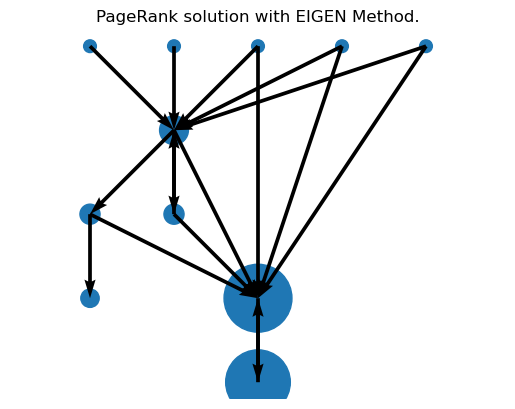

In [8]:
plt.figure(2)
size_vertex_plot = 1e3*6
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*x_pagerank)
plt.quiver(XE[:,0], XE[:,1], E[:,0], E[:,1], scale=1., units='xy') 
plt.title('PageRank solution with EIGEN Method.')
plt.axis('equal')
plt.axis('off') 
plt.show()

In [9]:
# PageRank values
x = x_pagerank
val = np.sort(x)[::-1] 
idx = np.argsort(x)[::-1]
index = np.array(range(1,1+n))
in_degree = np.array(W.sum(axis=0)).squeeze(axis=0)
out_degree =  np.array(W.sum(axis=1)).squeeze(axis=1)
index = index[idx]
in_degree = in_degree[idx]
out_degree = out_degree[idx]
print('\n  ''Node'' | ''PageRank'' | ''In-degree'' | ''Out-degree'' ')
for i in range(n):
    print('   ',index[i], '  ', round(val[i],3) ,'      ', in_degree[i],'      ', out_degree[i], end='\n')


  Node | PageRank | In-degree | Out-degree 
    2    0.398        7.0        1.0
    3    0.361        1.0        1.0
    5    0.072        6.0        3.0
    4    0.035        1.0        2.0
    6    0.035        1.0        2.0
    1    0.029        1.0        0.0
    10    0.014        0.0        1.0
    8    0.014        0.0        2.0
    9    0.014        0.0        2.0
    11    0.014        0.0        1.0
    7    0.014        0.0        2.0


### Question 2: Implementing PageRank Using the Power Method

Refer to Slide 19 from Lecture 5.


(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) (11, 1)
(11, 1) 

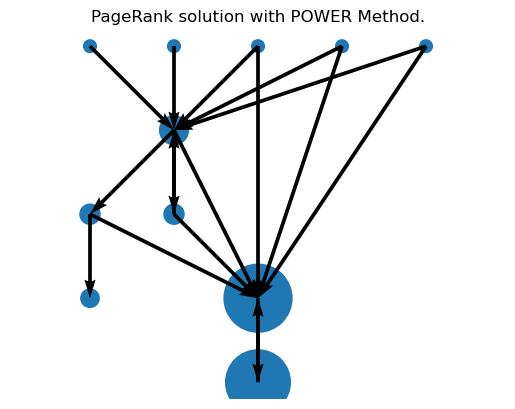

In [25]:
# Power Method

# Initialization
x = e # 1_n / n
diffx = 1e10
k = 0

# Iterative scheme
start = time.time()
alpha = 0.85
while (k<1000) & (diffx>1e-6):
    
    # Update iteration
    k += 1

    # Update x
    xold = x # xold = u_k, x = u_(k+1)
    
    ############################################################################
    # Your code starts
    ############################################################################
    first_term = alpha * invD.dot(W.todense()).T.dot(x)
    second_term = (1 - alpha) * e
    print(first_term.shape, second_term.shape)
    x = first_term + second_term
    ############################################################################
    # Your code ends
    ############################################################################
    
    # Stopping condition
    diffx = np.linalg.norm(x-xold,1)
    
x_pagerank_PM = np.array(x).squeeze(axis=1)

# Computational time
print('Computational time for PageRank solution with POWER Method (sec):',time.time() - start)

plt.figure(3)
size_vertex_plot = 1e3*6
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*x_pagerank)
plt.quiver(XE[:,0], XE[:,1], E[:,0], E[:,1], scale=1., units='xy') 
plt.title('PageRank solution with POWER Method.')
plt.axis('equal')
plt.axis('off') 
plt.show()

# Real-world dataset CALIFORNIA

nb of nodes= 9665
nb of edges= 16150
(9665, 9665)


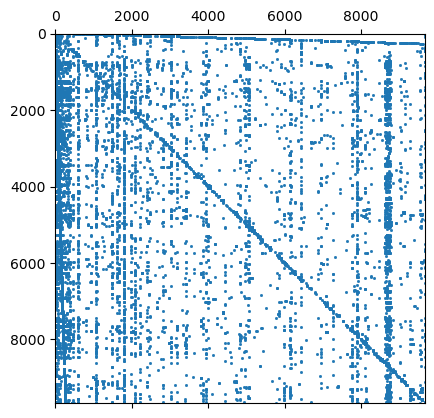

In [26]:
###########################
# California graph
#   http://vlado.fmf.uni-lj.si/pub/networks/data/mix/mixed.htm
#   This graph was constructed by expanding a 200-page response set 
#   to a search engine query 'California'.
###########################

network = np.loadtxt('datasets/california.dat')
row = network[:,0]-1
col = network[:,1]-1
n = int(np.max(network))+1 # nb of vertices
ne = len(row)
print('nb of nodes=',n)
print('nb of edges=',ne)

# Create Adjacency matrix W
data = np.ones([ne])
W = scipy.sparse.csr_matrix((data, (row, col)), shape=(n, n))
Wref = W
print(W.shape)

# Plot adjacency matrix
plt.figure(4)
plt.spy(W,precision=0.01, markersize=1)
plt.show()

In [27]:
# Solve eigenproblem

# vector of 1's
e = np.ones([n,1])/n 
one = np.ones([n,1])

# Dumpling vector
D = np.array(W.sum(axis=1),dtype='float32').squeeze()
a_idx = np.zeros([n],dtype='int32')
a_idx[np.where(D<1./2)] = 1
a = (1.0* a_idx)[:,None]

# Compute P = W D^{-1}
invD = 1./(D+1e-10)
invD[a_idx==1] = 0
invD = np.diag(invD)
W = Wref.todense()
P = invD.dot(W).T

# EVD
alpha = 0.85
start = time.time()
Phat = alpha* P +  alpha* e.dot(a.T) + (1.0-alpha)* e.dot(one.T)
Phat = scipy.sparse.csr_matrix(Phat)
lamb, U = scipy.sparse.linalg.eigs(Phat, k=1, which='LM') 
x_pagerank = np.abs(U[:,0])/ np.sum(np.abs(U[:,0]))

# Computational time
print('Computational time for PageRank solution with EIGEN Method (sec):',time.time() - start)

Computational time for PageRank solution with EIGEN Method (sec): 7.437927007675171


In [28]:
# Power Method

# Initialization
x = e
diffx = 1e10
k = 0

# Iterative scheme
start = time.time()
alpha = 0.85
while (k<1000) & (diffx>1e-6):
    
    # Update iteration
    k += 1

    # Update x
    xold = x
    x = alpha* P.dot(x) + e.dot( alpha* a.T.dot(x) + (1.0-alpha) )
    
    # Stopping condition
    diffx = np.linalg.norm(x-xold,1)
    
x_pagerank_PM = np.array(x).squeeze(axis=1)

# Computational time
print('Computational time for PageRank solution with POWER Method (sec):',time.time() - start)

Computational time for PageRank solution with POWER Method (sec): 0.6995229721069336


### Question 3: Compare the Time Complexity of the Spectral Approach $O(N^2)$ and the Power Method $O(E)$
